# Image Compression using k-means ( Andrew NG)

In [1]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0] #3 rows
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distance=[]
        for j in range(centroids.shape[0]):
            norm_ij=np.linalg.norm(X[i]-centroids[j])
            distance.append(norm_ij)
        idx[i]=np.argmin(distance)
    return idx

In [2]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for i in range(K):
        points=X[i == idx]
        centroids[i]=np.mean(points,axis=0)
    return centroids

In [3]:
def run_kMeans(X, initial_centroids, max_iters=10):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

In [4]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img=plt.imread('landscape.jpg')
img=img/255

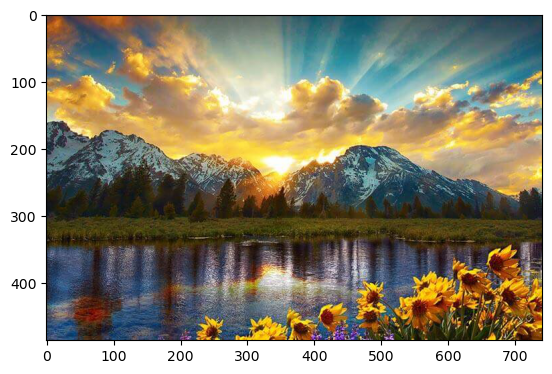

In [7]:
plt.imshow(img)

# K=3

In [8]:
X_img = np.reshape(img, (img.shape[0] * img.shape[1], 3))
X_img.shape

(360126, 3)

In [18]:
%%time
K = 3
max_iters = 10               
initial_centroids = kMeans_init_centroids(X_img, K) 
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
CPU times: total: 55.8 s
Wall time: 1min 15s


In [19]:
centroids.shape,idx.shape

((3, 3), (360126,))

In [20]:
centroids[idx,:].shape

(360126, 3)

In [21]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, img.shape)

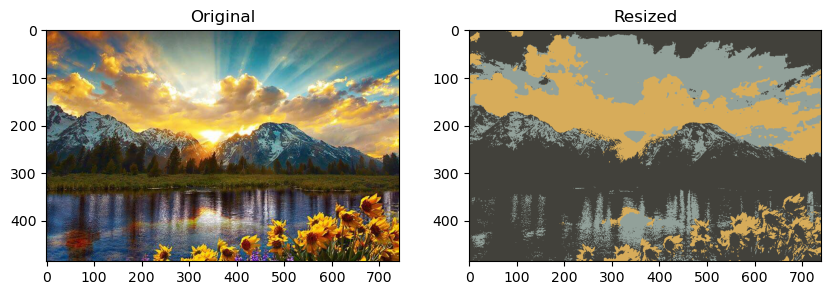

In [22]:
fig,ax=plt.subplots(1,2,figsize=(10,12))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(X_recovered)
ax[1].set_title('Resized')
plt.show();

# K=5

In [25]:
%%time
K = 15
max_iters = 10               
initial_centroids = kMeans_init_centroids(X_img, K) 
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 
# Represent image in terms of indices
X_recovered = centroids[idx, :] 
# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, img.shape)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
CPU times: total: 3min 37s
Wall time: 4min 52s


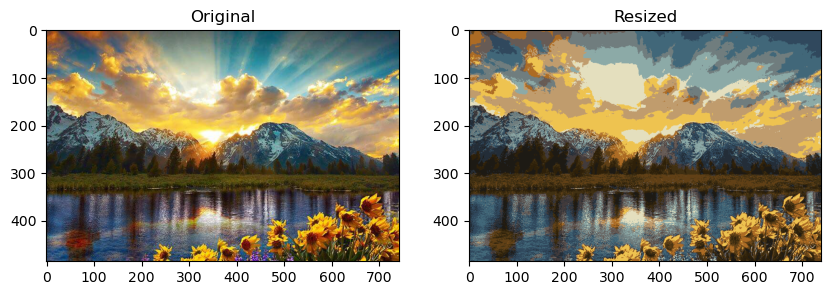

In [26]:
fig,ax=plt.subplots(1,2,figsize=(10,12))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(X_recovered)
ax[1].set_title('Resized')
plt.show();

# K=10

In [23]:
%%time
K = 15
max_iters = 10               
initial_centroids = kMeans_init_centroids(X_img, K) 
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 
# Represent image in terms of indices
X_recovered = centroids[idx, :] 
# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, img.shape)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
CPU times: total: 3min 39s
Wall time: 4min 55s


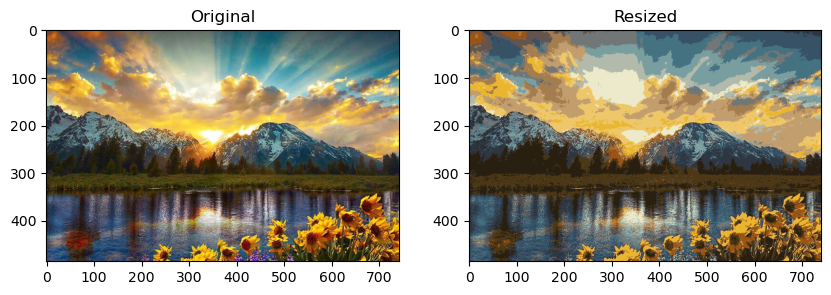

In [24]:
fig,ax=plt.subplots(1,2,figsize=(10,12))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(X_recovered)
ax[1].set_title('Resized')
plt.show();

Original Image = 360126 x 24 = 86,43,024


Resized_Image= 30×24+360126×4 = 14,41,216 bits


Compressing image by about = 6 times